In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Hyperleda Query

In [24]:
plt.rcParams.update({'font.size': 25})
plt.style.use("dark_background")

In [25]:
df = pd.read_csv('hyperleda_new.csv').dropna()
df

,Objectname,distance_modulus,v_gsr,distance_mpc
0,PGC3116657,37.250,25977.0,281.838293
1,PGC3116670,37.590,22950.3,329.609712
2,UGC00866,31.863,1803.2,23.583052
3,NGC0497,35.255,8193.1,112.460497
4,PGC1183727,37.570,28268.3,326.587832
...,...,...,...,...
4232,ESO576-050,31.002,1858.6,15.863536
4233,NGC4628,33.160,2709.0,42.854852
4234,ESO373-008,29.930,702.7,9.682779
4235,NGC1494,30.466,970.7,12.393672


In [26]:
distance_mpc = df['distance_mpc']
vel_gsr =  df['v_gsr']


Text(0, 0.5, 'Vel(km/s)')

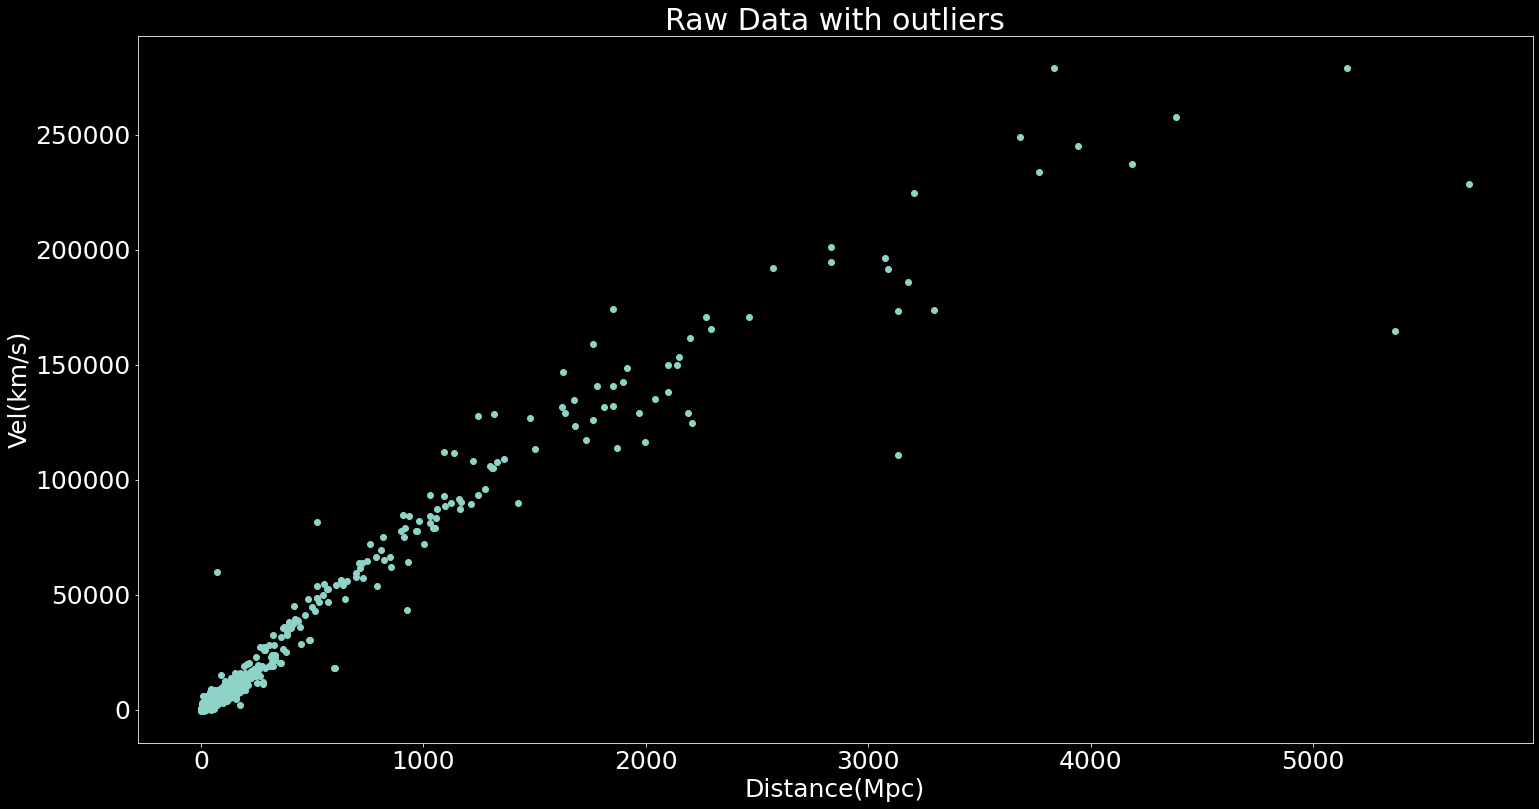

In [27]:
plt.figure(figsize = (25,13))
plt.scatter(distance_mpc,vel_gsr)
plt.title('Raw Data with outliers')
plt.xlabel('Distance(Mpc)')
plt.ylabel('Vel(km/s)')

In [34]:
df_filtered = df.where(df.where(df['distance_mpc']<200).dropna()['v_gsr']<20000).dropna()
distance_mpc_filtered = df_filtered['distance_mpc']
vel_gsr_filtered =  df_filtered['v_gsr']
df_filtered

,Objectname,distance_modulus,v_gsr,distance_mpc
2,UGC00866,31.863,1803.2,23.583052
3,NGC0497,35.255,8193.1,112.460497
5,NGC2410,33.970,4648.6,62.230029
6,PGC090796,35.650,8527.9,134.896288
7,PGC090801,33.970,3863.3,62.230029
...,...,...,...,...
4232,ESO576-050,31.002,1858.6,15.863536
4233,NGC4628,33.160,2709.0,42.854852
4234,ESO373-008,29.930,702.7,9.682779
4235,NGC1494,30.466,970.7,12.393672


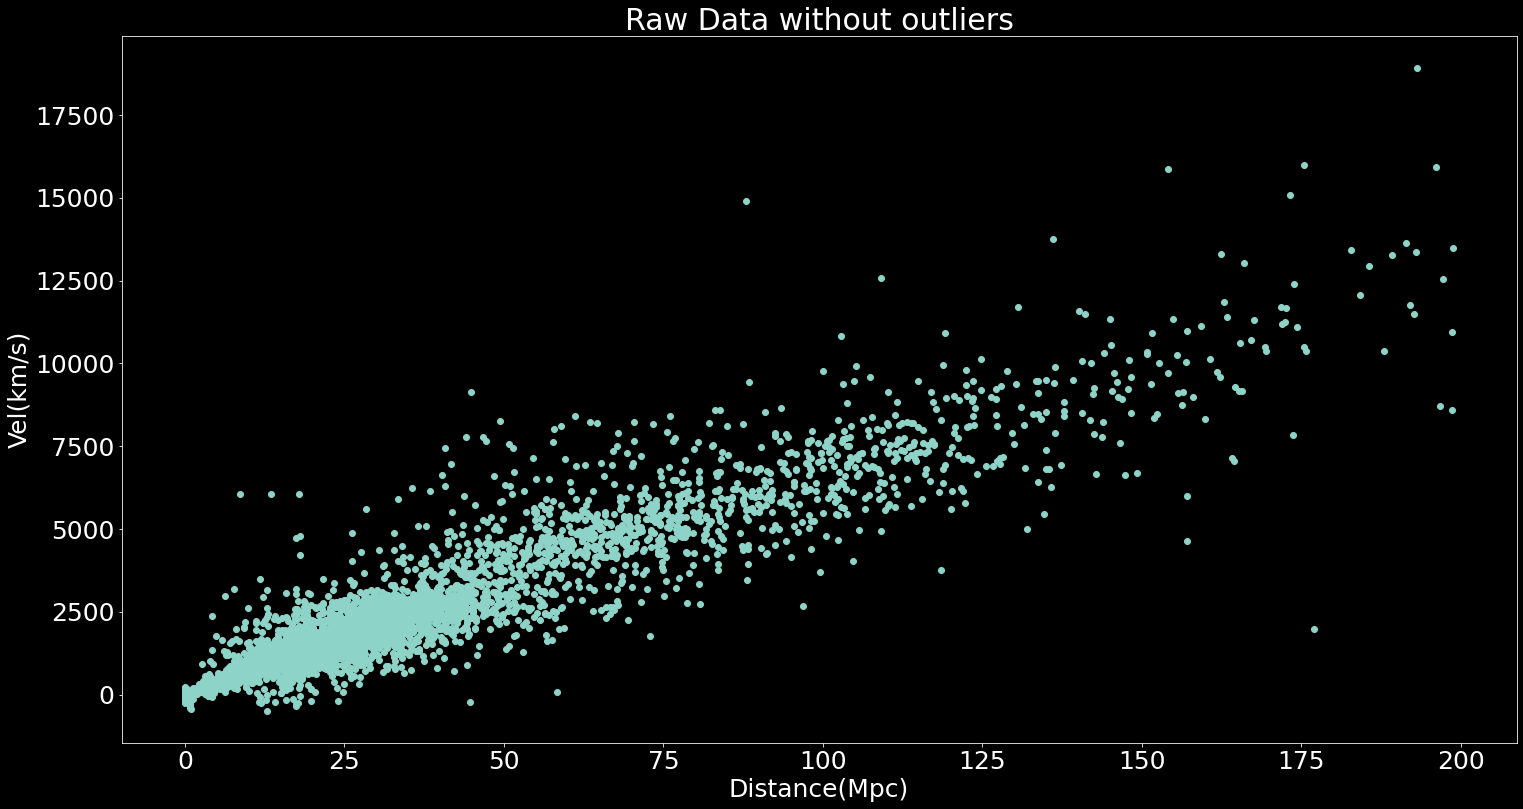

In [35]:
plt.figure(figsize = (25,13))
plt.scatter(distance_mpc_filtered,vel_gsr_filtered)
#plt.ylim(-1000, 20000)
plt.title('Raw Data without outliers')
plt.xlabel('Distance(Mpc)')
plt.ylabel('Vel(km/s)')
plt.show()


In [36]:
distance_mpc_filtered

2        23.583052
3       112.460497
5        62.230029
6       134.896288
7        62.230029
           ...    
4232     15.863536
4233     42.854852
4234      9.682779
4235     12.393672
4236     14.825181
Name: distance_mpc, Length: 3864, dtype: float64

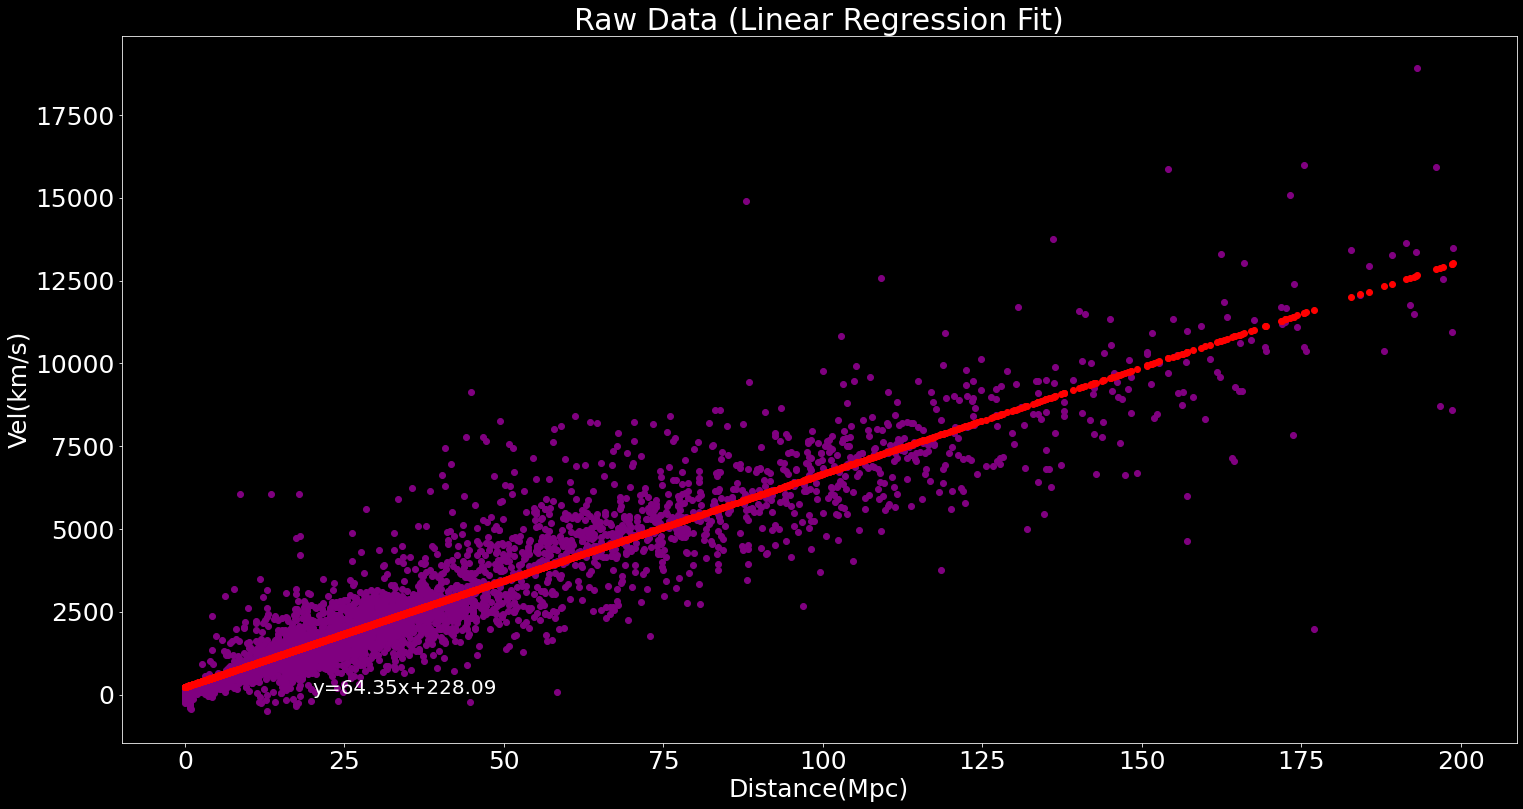

In [51]:
from sklearn.linear_model import LinearRegression as lgr
model = lgr().fit(np.array(distance_mpc_filtered).reshape(-1, 1), vel_gsr_filtered)
predicted_vel_gsr = model.coef_ * distance_mpc_filtered + model.intercept_
plt.figure(figsize = (25,13))
plt.scatter(distance_mpc_filtered,vel_gsr_filtered, c='purple')
plt.scatter(distance_mpc_filtered,predicted_vel_gsr, c='red')
plt.text(20, 20, 'y={:.2f}x+{:.2f}'.format(float(model.coef_), model.intercept_),  fontsize = 20)
#plt.ylim(-1000, 20000)
plt.title('Raw Data (Linear Regression Fit)')
plt.xlabel('Distance(Mpc)')
plt.ylabel('Vel(km/s)')
plt.show()


# Random Simulation

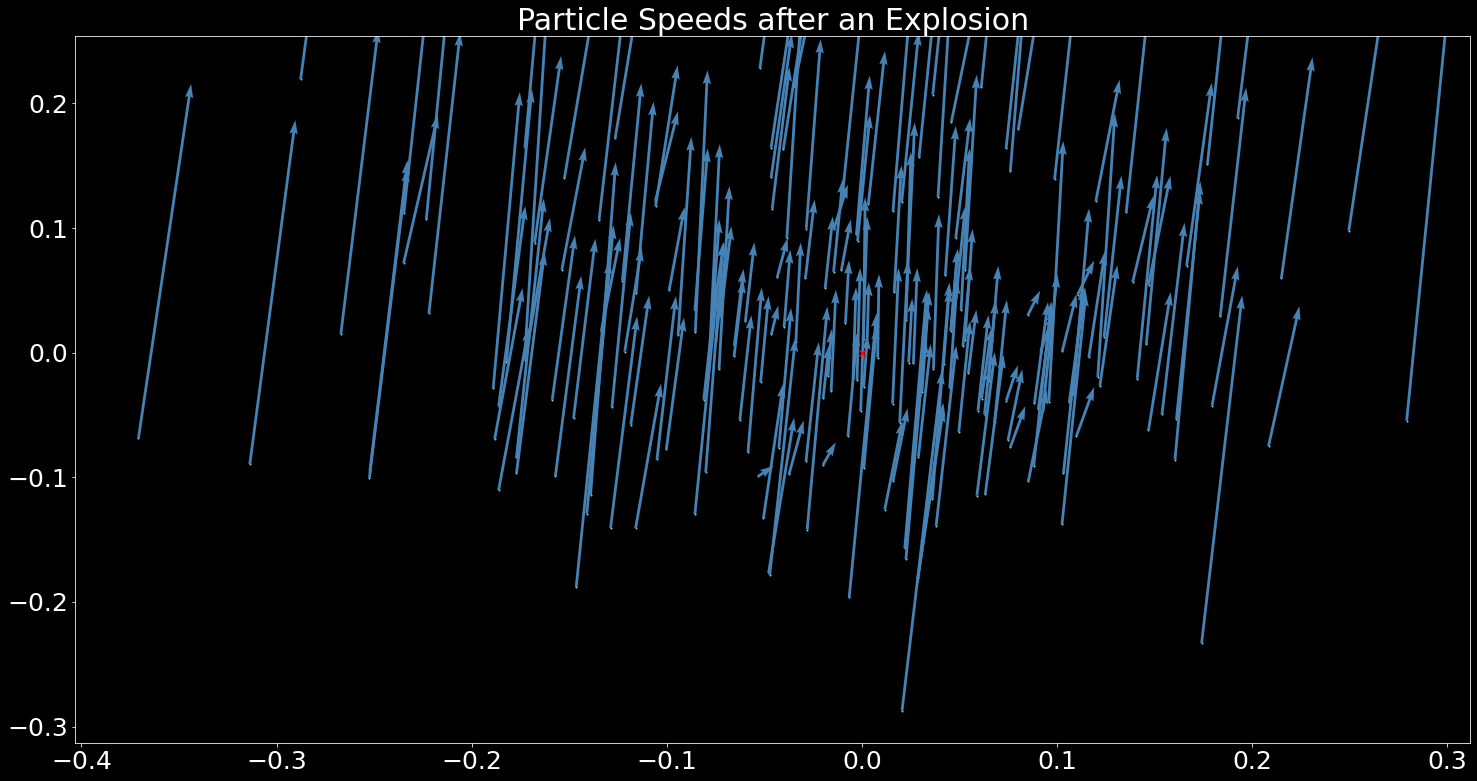

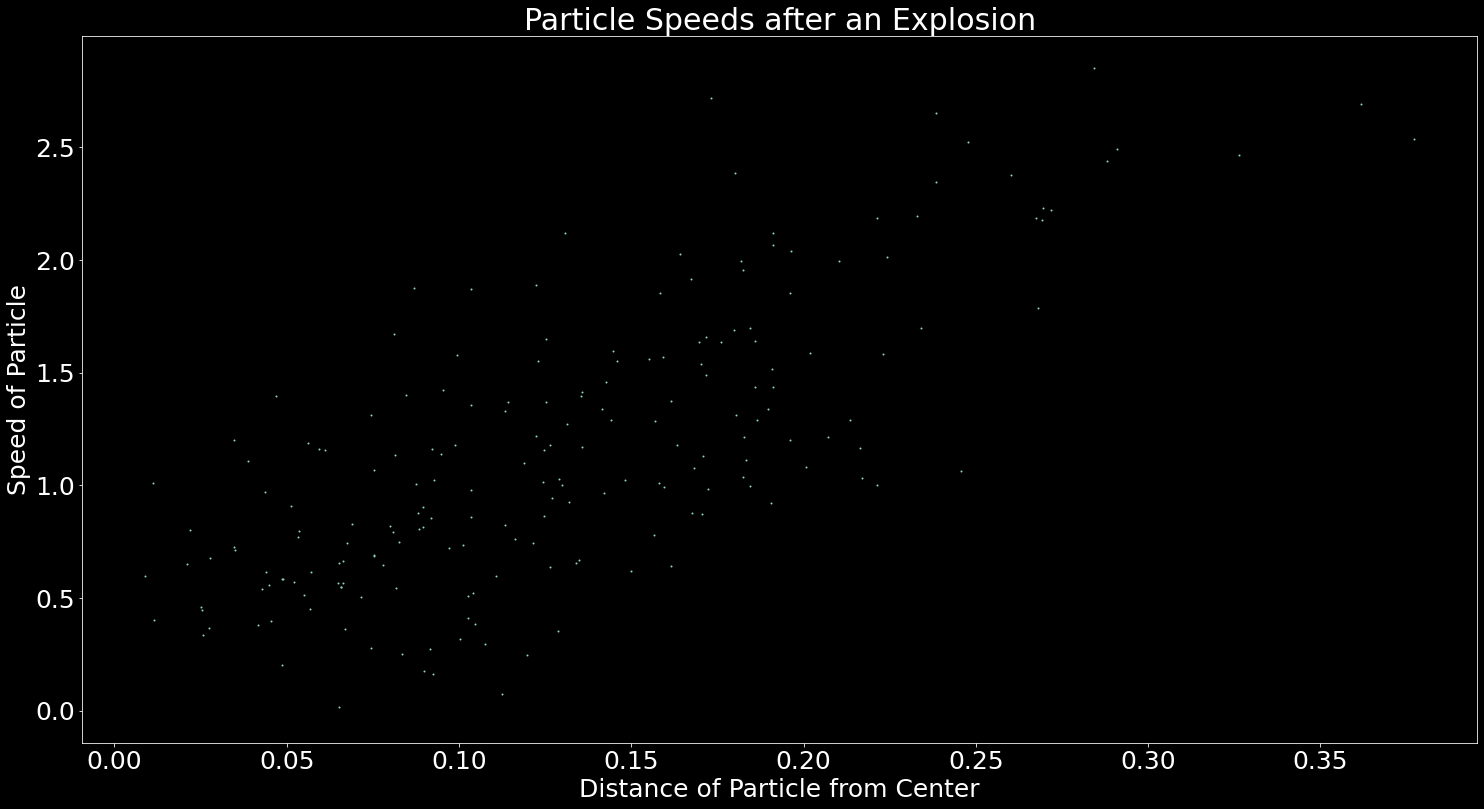

In [30]:
import numpy as np
import matplotlib.pyplot as plt

sim_particles = 500

# Simulates a vector explosion
bigbang = np.column_stack((np.random.normal(0, 1, n), np.random.normal(0, 1, n)))
bigbang_dx = bigbang[:, 0] * 0.1 + 0.05 * np.random.normal(0, 1, n)
bigbang_dy = bigbang[:, 1] * 0.1 + 0.05 * np.random.normal(0, 1, n)
bigbang_speed= np.sqrt(bigbang_dx** 2 + bigbang_dy ** 2)
bigbang_distance = np.sqrt(bigbang[:, 0] ** 2 + bigbang[:, 1] ** 2)

# Plot 1: Particle Speeds after an Explosion
fig, ax = plt.subplots(figsize=(25, 13))
ax.scatter(bigbang_dx, bigbang_dy, s=1)
ax.quiver(bigbang_dx, bigbang_dy, bigbang_speed, bigbang_distance, color='steelblue', scale=10, width=0.002)
ax.scatter(0, 0, color='red', marker='x')
ax.set_title('Particle Speeds after an Explosion')

# Plot 2: Particle Speeds vs. Distance from Center
fig, ax = plt.subplots(figsize=(25, 13))
ax.scatter(bigbang_speed, bigbang_distance, s=1)
ax.plot(bigbang_speed, bigbang_distance * 0, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Distance of Particle from Center')
ax.set_ylabel('Speed of Particle')
ax.set_title('Particle Speeds after an Explosion')
plt.show()

